# Bite Size Bayes

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

## Review

[In the previous notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/05_test.ipynb) we used a Bayes table to interpret medical tests.

In this notebook we'll solve an expanded version of the cookie problem with 101 Bowls.  It might seem like a silly problem, but it's not: the solution demonstrates a Bayesian way to estimate a proportion, and it applies to lots of real problems that don't involve cookies.

Then I'll introduce an alternative to the Bayes table, a probability mass function (PMF), which is a useful way to represent and do computations with distributions.

Here's the function, from the previous notebook, we'll use to make Bayes tables:

In [1]:
import pandas as pd

def make_bayes_table(hypos, prior, likelihood):
    """Make a Bayes table.
    
    hypos: sequence of hypotheses
    prior: prior probabilities
    likelihood: sequence of likelihoods
    
    returns: DataFrame
    """
    table = pd.DataFrame(index=hypos)
    table['prior'] = prior
    table['likelihood'] = likelihood
    table['unnorm'] = table['prior'] * table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return table

## 101 Bowls

In [Notebook 4](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/05_dice.ipynb), we saw that the Bayes table works with more than two hypotheses.  As an example, we solved a cookie problem with five bowls.

Now we'll take it even farther and solve a cookie problem with 101 bowls:

* Bowl 0 contains no vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

As in the previous problems, there are only two kinds of cookies, vanilla and chocolate.  So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla.  What is the probability that the cookie came from Bowl $x$, for each value of $x$?

To solve this problem, I'll use `np.arange` to represent 101 hypotheses, numbered from 0 to 100.

In [2]:
import numpy as np

xs = np.arange(101)

The prior probability for each bowl is $1/101$.  I could create a sequence with 101 identical values, but if all of the priors are equal, we only have to probide one value:

In [3]:
prior = 1/101

Because of the way I numbered the bowls, the probability of a vanilla cookie from Bowl $x$ is $x/100$.  So we can compute the likelihoods like this:

In [4]:
likelihood = xs/100

And that's all we need; the Bayes table does the rest:

In [5]:
table = make_bayes_table(xs, prior, likelihood)

Here's a feature we have not seen before: we can give the index of the Bayes table a name, which will appear when we display the table.

In [6]:
table.index.name = 'Bowl'

Here are the first few rows:

In [7]:
table.head()

,prior,likelihood,unnorm,posterior
Bowl,,,,
0,0.009901,0.00,0.000000,0.000000
1,0.009901,0.01,0.000099,0.000198
2,0.009901,0.02,0.000198,0.000396
3,0.009901,0.03,0.000297,0.000594
4,0.009901,0.04,0.000396,0.000792


Because Bowl 0 contains no vanilla cookies, its likelihood is 0, so its posterior probability is 0.  That is, the cookie cannot have come from Bowl 0.

Here are the last few rows of the table.

In [8]:
table.tail()

,prior,likelihood,unnorm,posterior
Bowl,,,,
96,0.009901,0.96,0.009505,0.019010
97,0.009901,0.97,0.009604,0.019208
98,0.009901,0.98,0.009703,0.019406
99,0.009901,0.99,0.009802,0.019604
100,0.009901,1.00,0.009901,0.019802


The posterior probabilities are substantially higher for the high-numbered bowls.

There is a pattern here that will be clearer if we plot the results.

In [9]:
import matplotlib.pyplot as plt

def plot_table(table):
    """Plot results from the 101 Bowls problem.
    
    table: DataFrame representing a Bayes table
    """
    table['prior'].plot()
    table['posterior'].plot()

    plt.xlabel('Bowl #')
    plt.ylabel('Probability')
    plt.legend()

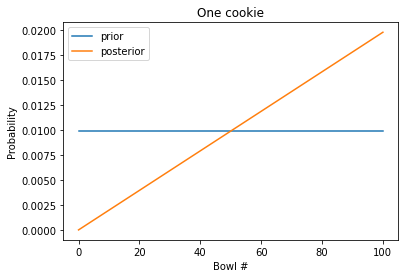

In [10]:
plot_table(table)
plt.title('One cookie');

The prior probabilities are uniform; that is, they are the same for every bowl.

The posterior probabilities increase linearly; Bowl 0 is the least likely (actually impossible), and Bowl 100 is the most likely.

## Two cookies

Suppose we put the first cookie back, stir the bowl thoroughly, and draw another cookie from the same bowl.  and suppose it turns out to be another vanilla cookie.

Now what is the probability that we are drawing from Bowl $x$?

To answer this question, we can use the posterior probabilities from the previous problem as prior probabilities for a new Bayes table, and then update with the new data.

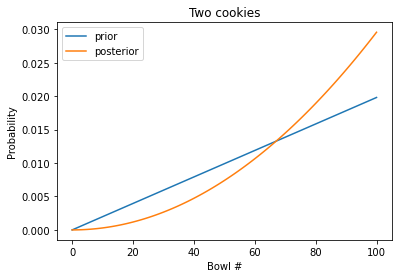

In [11]:
prior2 = table['posterior']
likelihood2 = likelihood

table2 = make_bayes_table(xs, prior2, likelihood2)
plot_table(table2)
plt.title('Two cookies');

The blue line shows the posterior after one cookie, which is the prior before the second cookie.

The orange line shows the posterior after two cookies, which curves upward.  Having see two vanilla cookies, the high-numbered bowls are more likely; the low-numbered bowls are less likely.

I bet you can guess what's coming next.

## Three cookies

Suppose we put the cookie back, stir, draw another cookie from the same bowl, and get a chocolate cookie.

What do you think the posterior distribution looks like after these three cookies?

Hint: what's the probability that the chocolate cookie came from Bowl 100?

We'll use the posterior after two cookies as the prior for the third cookie:

In [12]:
prior3 = table2['posterior']

Now, what about the likelihoods?  Remember that the probability of a vanilla cookie from Bowl $x$ is $x/100$.  So the probability of a chocolate cookie is $(1 - x/100)$, which we can compute like this.

In [13]:
likelihood3 = 1 - xs/100

That's it.  Everything else is the same.

In [14]:
table3 = make_bayes_table(xs, prior3, likelihood3)

And here are the results

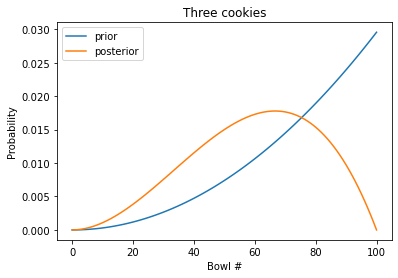

In [15]:
plot_table(table3)
plt.title('Three cookies');

The blue line is the posterior after two cookies; the orange line is the posterior after three cookies.

Because Bowl 100 contains no chocolate cookies, the posterior probability for Bowl 100 is 0.

The posterior distribution has a peak near 60%.  We can use `idxmax` to find it: 

In [16]:
table3['posterior'].idxmax()

67

The peak in the posterior distribution is at 67%.

This value has a name; it is the **MAP**, which stands for "Maximum Aposteori Probability" ("aposteori" is Latin for posterior).

In this example, the MAP is close to the proportion of vanilla cookies in the dataset: 2/3.

**Exercise:** Let's do a version of the dice problem where we roll the die more than once.  Here's the statement of the problem again:

> Suppose you have a 4-sided, 6-sided, 8-sided, and 12-sided die.  You choose one at random, roll it and get a 1. What is the probability that the die you rolled is 4-sided?  What are the posterior probabilities for the other dice?

And here's a solution using a Bayes table:

In [17]:
hypos = ['H4', 'H6', 'H8', 'H12']
prior = 1/4
likelihood = 1/4, 1/6, 1/8, 1/12

table = make_bayes_table(hypos, prior, likelihood)
table

,prior,likelihood,unnorm,posterior
H4,0.25,0.250000,0.062500,0.400000
H6,0.25,0.166667,0.041667,0.266667
H8,0.25,0.125000,0.031250,0.200000
H12,0.25,0.083333,0.020833,0.133333


Now suppose you roll the same die again and get a 6.  What are the posterior probabilities after the second roll?

Use `idxmax` to find the MAP.

In [18]:
# Solution goes here

In [19]:
# Solution goes here

## Probability Mass Functions

When we do more than one update, we don't always want to keep the whole Bayes table.  In this section we'll replace the Bayes table with a more compact representation, a probability mass function, or PMF.

A PMF is a set of possible outcomes and their corresponding probabilities.  There are many ways to represent a PMF; in this notebook I'll use a Pandas Series.

Here's a function that takes a sequence of outcomes, `xs`, and a sequence of probabilities, `ps`, and returns a Pandas Series that represents a PMF.

In [20]:
def make_pmf(xs, ps, **options):
    """Make a Series that represents a PMF.
    
    xs: sequence of values
    ps: sequence of probabilities
    options: keyword arguments passed to Series constructor
    
    returns: Pandas Series
    """
    pmf = pd.Series(ps, index=xs, **options)
    return pmf

And here's a PMF that represents the prior from the 101 Bowls problem.

In [21]:
xs = np.arange(101)
prior = 1/101

pmf = make_pmf(xs, prior)
pmf.head()

0    0.009901
1    0.009901
2    0.009901
3    0.009901
4    0.009901
dtype: float64

Now that we have a priod, we need to compute likelihoods.

Here are the likelihoods for a vanilla cookie:

In [22]:
likelihood_vanilla = xs / 100

And for a chocolate cookie.

In [23]:
likelihood_chocolate = 1 - xs / 100

To compute posterior probabilities, I'll use the following function, which takes a PMF and a sequence of likelihoods, and updates the PMF:

In [24]:
def bayes_update(pmf, likelihood):
    """Do a Bayesian update.
    
    pmf: Series that represents the prior
    likelihood: sequence of likelihoods
    """
    pmf *= likelihood
    pmf /= pmf.sum()

The steps here are the same as in the Bayes table:

1. Multiply the prior by the likelihoods.

2. Add up the products to get the total probability of the data.

3. Divide through to normalize the posteriors.

Now we can do the update for a vanilla cookie.

In [25]:
bayes_update(pmf, likelihood_vanilla)

Here's what the PMF looks like after the update.

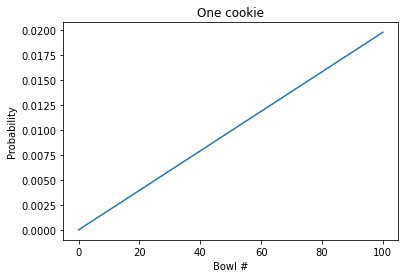

In [26]:
pmf.plot()

plt.xlabel('Bowl #')
plt.ylabel('Probability')
plt.title('One cookie');

That's consistent with what we got with the Bayes table.

The advantage of using a PMF is that it is easier to do multiple updates.  The following cell starts again with the uniform prior and does updates with two vanilla cookies and one chocolate cookie:

In [27]:
data = 'VVC'

pmf = make_pmf(xs, prior)

for cookie in data:
    if cookie == 'V':
        bayes_update(pmf, likelihood_vanilla)
    else:
        bayes_update(pmf, likelihood_chocolate)

Here's what the results look like:

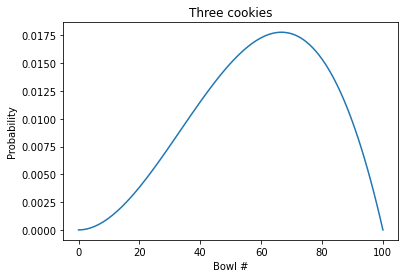

In [28]:
pmf.plot()

plt.xlabel('Bowl #')
plt.ylabel('Probability')
plt.title('Three cookies');

Again, that's consistent with what we got with the Bayes table.

In the next section, I'll use a PMF and `bayes_update` to solve a dice problem.

## The dice problem

As an exercise, let's do one more version of the dice problem:

> Suppose you have a 4-sided, 6-sided, 8-sided, 12-sided, and a **20-sided die**.  You choose one at random, roll it and **get a 7**. What is the probability that the die you rolled is 4-sided?  What are the posterior probabilities for the other dice?

Notice that in this version I've added a 20-sided die and the outcome is 7, not 1.

Here's a PMF that represents the prior:

In [29]:
sides = np.array([4, 6, 8, 12, 20])
prior = 1/5

pmf = make_pmf(sides, prior)
pmf

4     0.2
6     0.2
8     0.2
12    0.2
20    0.2
dtype: float64

In this version, the hypotheses are integers rather than strings, so we can compute the likelihoods like this:

In [30]:
likelihood = 1 / sides

But the outcome is 7, so any die with fewer than 7 sides has likelihood 0.

We can adjust `likelihood` by making a Boolean Series:

In [31]:
too_low = (sides < 7)

And using it to set the corresponding elements of `likelihood` to 0.

In [32]:
likelihood[too_low] = 0
likelihood

array([0.        , 0.        , 0.125     , 0.08333333, 0.05      ])

Now we can do the update and display the results.

In [33]:
bayes_update(pmf, likelihood)
pmf

4     0.000000
6     0.000000
8     0.483871
12    0.322581
20    0.193548
dtype: float64

The 4-sided and 6-sided dice have been eliminated.  Of the remaining dice, the 8-sided die is the most likely.

**Exercise:** Suppose you have the same set of 5 die.  You choose a die, roll it six times, and get 6, 7, 2, 5, 1, and 2 again.  Use `idxmax` to find the MAP.  What is the posterior probability of the MAP?

In [34]:
# Solution goes here

In [35]:
# Solution goes here

In [36]:
# Solution goes here

In [37]:
# Solution goes here

## Summary

In this notebook, we extended the cookie problem with more bowls and the dice problem with more dice.

I defined the MAP, which is the quantity in a posterior distribution with the highest probability.

Although the cookie problem is not particularly realistic or useful, the method we used to solve it applies to many problems in the real world where we want to estimate a proportion.

[In the next notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/07_euro.ipynb) we'll use the same method to take another step toward doing Bayesian statistics.